In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision import models

import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(444)
if device == 'cuda':
    torch.cuda.manual_seed_all(444)
print(device + ' is avaulable')

cuda is avaulable


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = '../data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [4]:
## 모델 불러오기

In [5]:
path = '../TrainedModel/Resnet18.pt'
resnet18 = torch.load(path)
resnet18.eval()
resnet18 = resnet18.cuda()

In [6]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [7]:
## FGSM (Fast Gradient Signed Method) 셍성

In [8]:
epsilons = 0.1

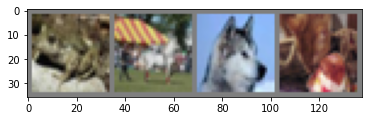

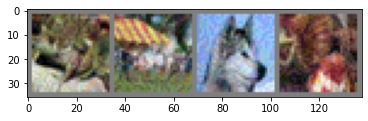

 frog horse   dog   cat


In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images = images.cuda()
labels = labels.cuda()

images.requires_grad = True

output = resnet18(images)
pred = output.max(1, keepdim = True)[1]

loss = F.nll_loss(output, labels)
resnet18.zero_grad()
loss.backward()

images_grad = images.grad.data

sign_images_grad = images_grad.sign()
FGSM_images = images + epsilons * sign_images_grad
FGSM_images = torch.clamp(FGSM_images, -1, 1)

images = images.cpu()
FGSM_images = FGSM_images.cpu()
labels = labels.cpu()

with torch.no_grad():
    imshow(torchvision.utils.make_grid(images))
    imshow(torchvision.utils.make_grid(FGSM_images))
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))